# H&M Personalized Fashion Recommendation


The dataset consists of 3 types:

Articles Dataset:

Contains metadata for 105,542 fashion articles, including attributes like product names, product groups, colors, and detailed descriptions. This dataset helps in understanding the characteristics of the products and supports content-based recommendations.

Customers Dataset:

Contains demographic and behavioral data for 1,371,980 customers, including attributes like age, club membership status, and activity indicators. This data enables customer segmentation and personalized recommendations.

Transactions Dataset:

Includes 31,788,324 records of customer-article transactions, capturing purchase history with details like transaction date, customer ID, and article ID. This dataset forms the foundation for building collaborative filtering models and identifying customer purchase patterns.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

### Loading the dataset

In [43]:
# Load datasets
articles = pd.read_csv("C:/Users/prana/OneDrive/Documents/Data Analytics Projects/Fashion Articles Prediction/articles.csv")
customers = pd.read_csv("C:/Users/prana/OneDrive/Documents/Data Analytics Projects/Fashion Articles Prediction/customers.csv")
transactions = pd.read_csv("C:/Users/prana/OneDrive/Documents/Data Analytics Projects/Fashion Articles Prediction/transactions_train.csv")

## Articles Data

In [13]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [14]:
articles.shape

(105542, 25)

In [15]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


# Data Cleaning- Articles

In [16]:
# Check for missing values
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [17]:
# Fill missing values
articles.fillna({'detail_desc': '', 'prod_name': 'Unknown'}, inplace=True)

The missing value analysis of the articles dataset shows that all columns have complete data except for detail_desc, which has 416 missing values. To ensure consistency and avoid issues during model building, we replaced the missing values in detail_desc with an empty string and assigned "Unknown" to missing values in prod_name. This preprocessing step ensures the dataset is clean and ready for analysis without losing valuable records.

In [18]:
#check for duplicates
articles.duplicated().sum()

0

# EDA

In [23]:
# Combine textual features for modeling
articles['combined_features'] = (
    articles['prod_name'] + " " +
    articles['product_group_name'] + " " +
    articles['detail_desc']
)

To prepare the data for content-based modeling, we created a new column called combined_features, which merges key textual attributes: prod_name, product_group_name, and detail_desc. This combined representation captures the descriptive details of each article, enabling effective text-based similarity analysis for the recommendation system. This feature will serve as the input for vectorization and similarity computations.

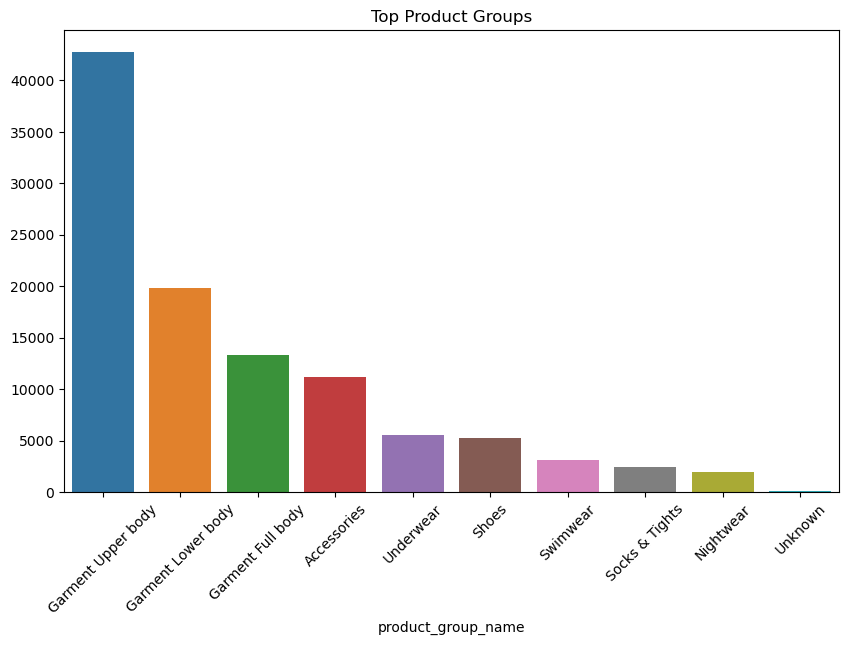

In [24]:
# Popular Product Groups
top_product_groups = articles['product_group_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_product_groups.index, y=top_product_groups.values)
plt.title("Top Product Groups")
plt.xticks(rotation=45)
plt.show()


The dataset has diverse product groups, with `Garment Upper body` being the most frequent.


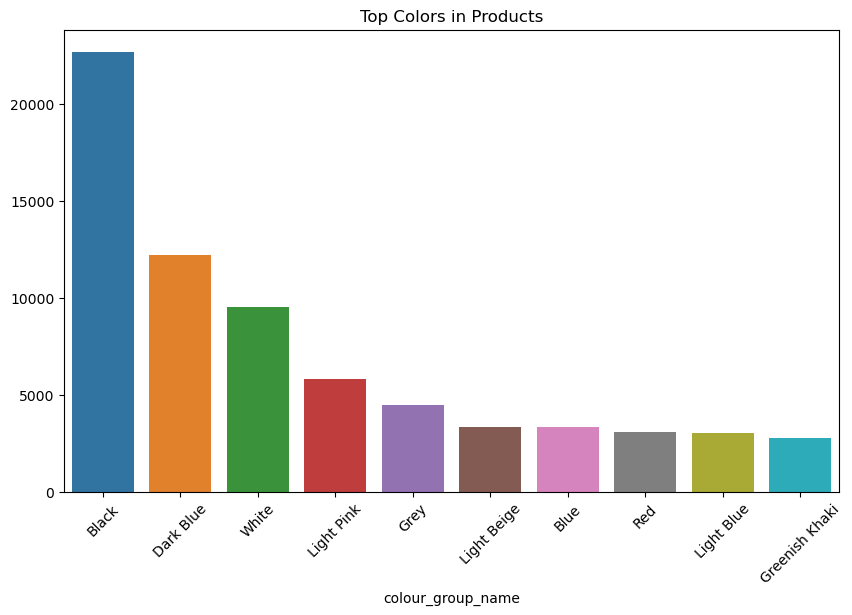

In [68]:
# Popular Colors
top_colors = articles['colour_group_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_colors.index, y=top_colors.values)
plt.title("Top Colors in Products")
plt.xticks(rotation=45)
plt.show()

This bar chart visualizes the top colors in products based on their frequency in the dataset. The color Black is the most common, followed by Dark Blue and White, indicating customer preference for neutral and versatile colors. 
Black dominates as the most frequently used color in the product catalog, with over 20,000 instances.
Dark Blue and White also contribute significantly, highlighting their popularity in product design.

# Model Building- Content-Based Recommendation

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

# Step 1: Vectorize Text Data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(articles['combined_features'])

# Step 2: Reduce Dimensionality using Truncated SVD
svd = TruncatedSVD(n_components=100, random_state=42)  # Reduce to 100 components
tfidf_reduced = svd.fit_transform(tfidf_matrix)

# Step 3: Fit Nearest Neighbors Model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)
nn_model.fit(tfidf_reduced)

# Step 4: Define the Recommendation Function
def recommend_articles(article_id, num_recommendations=5):
    """
    Recommend articles similar to the given article_id using nearest neighbors.
    """
    # Find the index of the article_id
    if article_id not in articles['article_id'].values:
        return f"Article ID {article_id} not found."
    
    idx = articles.index[articles['article_id'] == article_id].tolist()[0]
    
    # Find nearest neighbors
    distances, indices = nn_model.kneighbors(tfidf_reduced[idx].reshape(1, -1), n_neighbors=num_recommendations+1)
    
    # Get recommended articles (exclude the input article)
    recommended_indices = indices.flatten()[1:]
    
    # Return the recommended articles with details
    return articles.iloc[recommended_indices][['article_id', 'prod_name', 'product_group_name', 'detail_desc']]

The TfidfVectorizer converts the combined textual features (prod_name, product_group_name, detail_desc) into numerical vectors.These vectors represent the importance of each word while reducing the impact of frequently occurring terms (e.g., "top," "jersey").

To handle high-dimensional TF-IDF vectors, TruncatedSVD reduces the data to 100 components.


A NearestNeighbors model is trained on the reduced vectors using cosine similarity.
This allows the model to find the most similar articles to a given article based on their textual representation.

The function recommend_articles retrieves the top n articles similar to a given article_id.
It uses the Nearest Neighbors model to identify the closest matches, excluding the input article itself.


In [31]:
# Step 5: Test the Recommendation System
example_article_id = 108775015  # Replace with an article ID from your dataset
recommendations = recommend_articles(article_id=example_article_id, num_recommendations=5)
print(recommendations)

       article_id      prod_name  product_group_name  \
2       108775051  Strap top (1)  Garment Upper body   
1       108775044      Strap top  Garment Upper body   
28587   623522002     Nina Strap  Garment Upper body   
28589   623522004     Nina Strap  Garment Upper body   
28588   623522003     Nina Strap  Garment Upper body   

                                          detail_desc  
2             Jersey top with narrow shoulder straps.  
1             Jersey top with narrow shoulder straps.  
28587  Fitted jersey top with narrow shoulder straps.  
28589  Fitted jersey top with narrow shoulder straps.  
28588  Fitted jersey top with narrow shoulder straps.  


## Customer Data

In [33]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [34]:
customers.shape

(1371980, 7)

In [35]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


# Data Cleaning- Customers data

In [36]:
# Check for missing values
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

FN and Active: These columns have a large number of missing values, indicating that they might not always be relevant for certain customers.

club_member_status and fashion_news_frequency: These fields have relatively few missing values and can be filled with default or meaningful values.

age: Contains 15,861 missing values. This is a critical column for demographic analysis, and filling it is necessary for accurate modeling.

In [37]:
# Fill missing values
customers.fillna({'age': customers['age'].median()}, inplace=True)

Missing values are replaced with the median age of all customers, ensuring that extreme values (outliers) do not skew the result.

Why median? The median is robust to outliers and provides a central value for the age distribution.

In [39]:
customers.duplicated().sum()

0

## Outlier detection

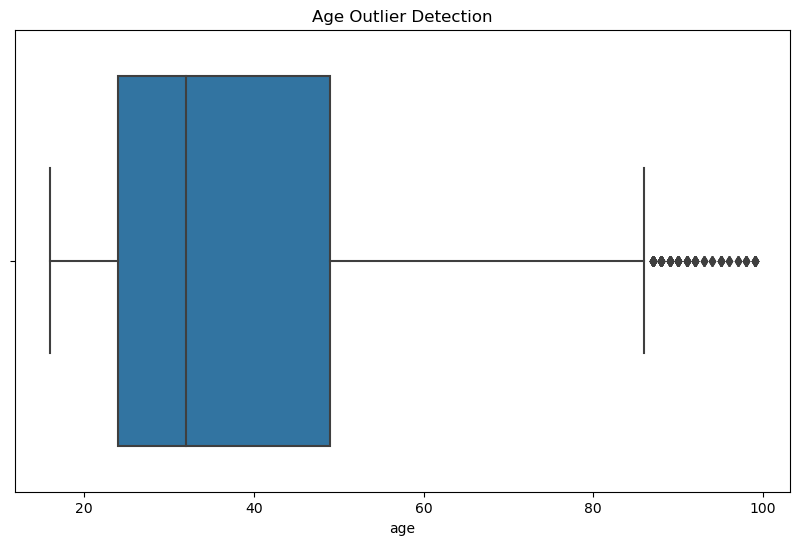

In [40]:
# Boxplot to visualize age outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=customers['age'])
plt.title("Age Outlier Detection")
plt.show()


The majority of customers are aged between approximately 20 and 60 years, which constitutes the typical target demographic.

There are a few outliers above the age of 80, which might represent older customers or potentially erroneous data.

The outliers represent legitimate older customers, which are part of the customer base. Removing them could lead to the loss of meaningful information.


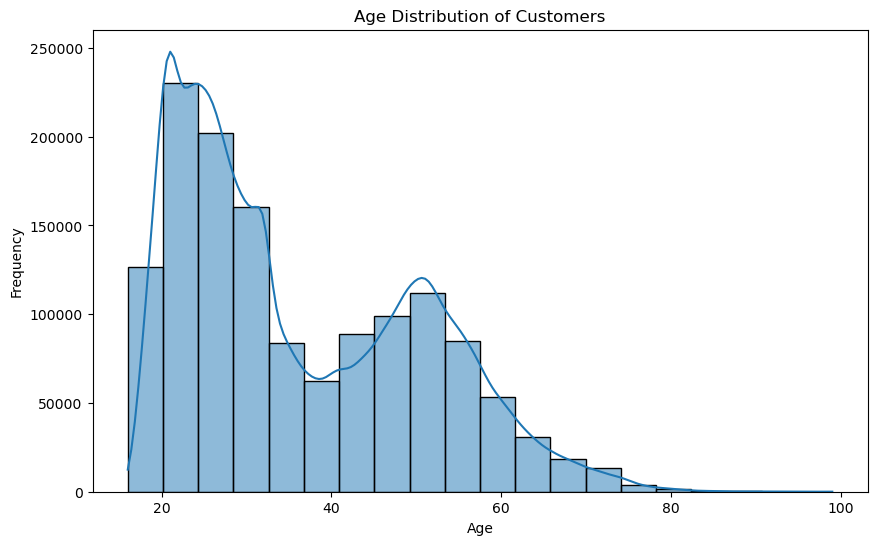

In [41]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(customers['age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Transactions Data

## Data Cleaning- Transactions Data

In [45]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [46]:
# Convert transaction dates
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

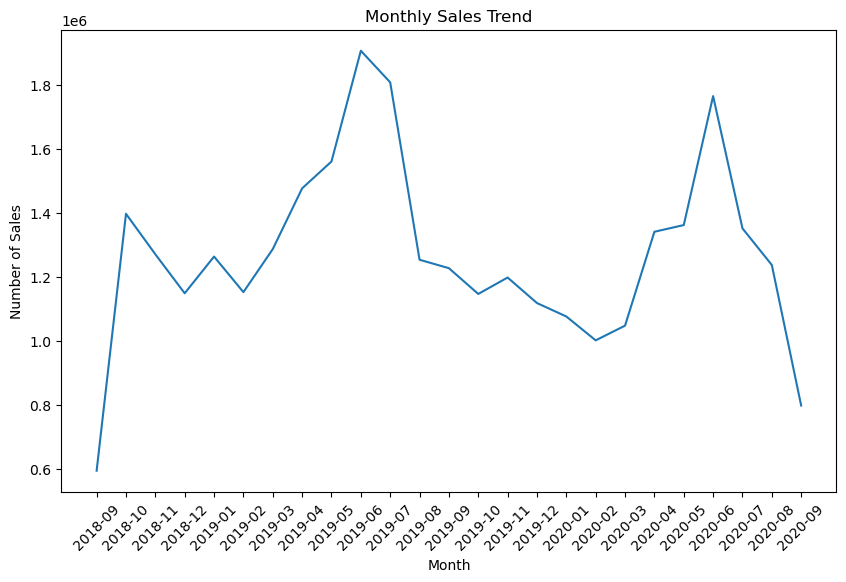

In [47]:
# Monthly Sales
transactions['month'] = transactions['t_dat'].dt.to_period('M')
monthly_sales = transactions.groupby('month').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()


Peaks and Troughs:

There are visible peaks in sales during specific months, possibly due to seasonal trends or promotional campaigns.
For example, the highest peak appears in mid-2019, which could coincide with sales events or a surge in customer activity.

Downward Trends:

There are dips in sales, such as late 2019 and mid-2020, which could reflect off-season periods or external factors like market changes.

COVID-19 Impact:

The decline in sales starting early 2020 aligns with the onset of the global COVID-19 pandemic, which may have disrupted retail activity.


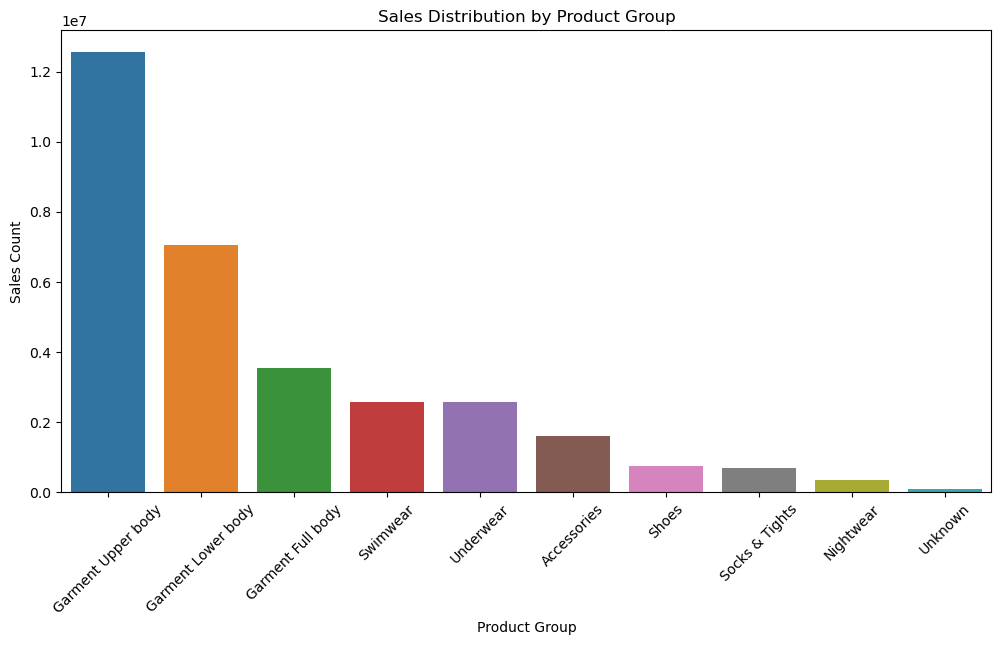

In [63]:
# Sales distribution by product group
product_sales_distribution = transactions.merge(articles, on='article_id')
group_sales = product_sales_distribution['product_group_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=group_sales.index, y=group_sales.values)
plt.title("Sales Distribution by Product Group")
plt.xlabel("Product Group")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.show()

Garment Upper Body dominates with the highest transaction count, indicating that tops, t-shirts, shirts, and similar items are the most popular among customers.

Garment Lower Body follows, showcasing the demand for pants, skirts, and similar items.

Categories like Nightwear, Socks & Tights, and Shoes have significantly lower sales counts, reflecting lower customer demand or niche usage.


# Model Building- K-means Clustering

In [50]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['purchase_count', 'days_active']])


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\clust

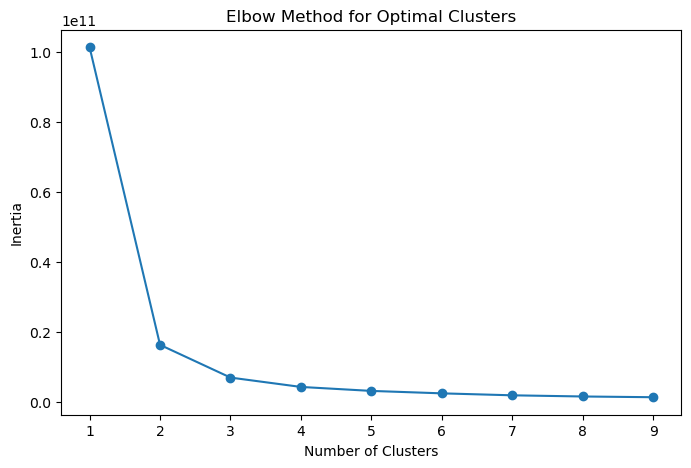

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute inertia for different numbers of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features[['purchase_count', 'days_active']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


As the number of clusters increases, inertia decreases significantly at first. The "elbow" is observed around 3 clusters, where the rate of decrease in inertia slows down significantly. Adding more clusters beyond this point yields diminishing returns. Based on the Elbow Method, the optimal number of clusters is 3. This ensures a balance between compact clusters and computational efficiency.




In [56]:
# Apply K-Means with optimal k (e.g., 3 clusters)
optimal_k = 3  # Replace with the value identified from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['segment'] = kmeans.fit_predict(scaled_features)


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 2-D Scatter Plot

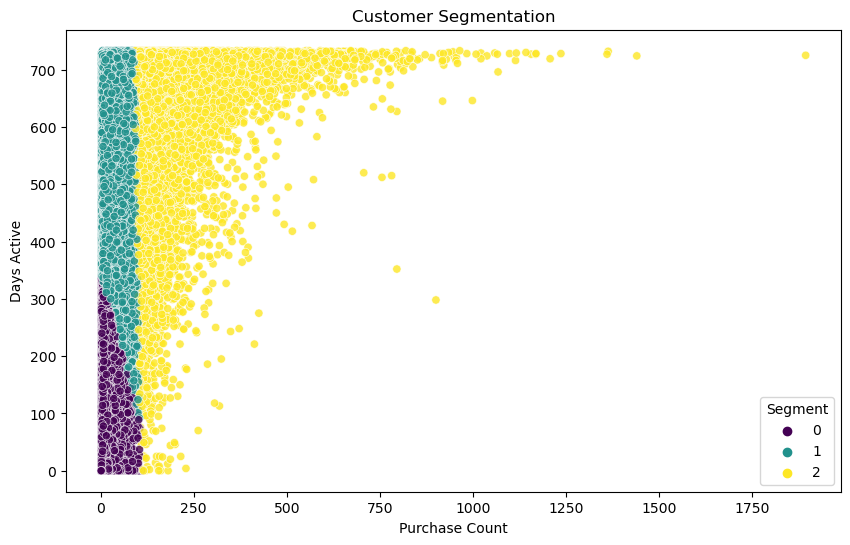

In [57]:
# 2D Scatter Plot of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features['purchase_count'], 
    y=customer_features['days_active'], 
    hue=customer_features['segment'], 
    palette='viridis', 
    alpha=0.8
)
plt.title("Customer Segmentation")
plt.xlabel("Purchase Count")
plt.ylabel("Days Active")
plt.legend(title="Segment")
plt.show()


The segment column now categorizes customers into three distinct clusters, which can represent varying levels of customer behavior or engagement:

Cluster 0: Low purchase activity (e.g., infrequent customers).

Cluster 1: Medium purchase activity (e.g., regular customers).

Cluster 2: High purchase activity (e.g., loyal customers).

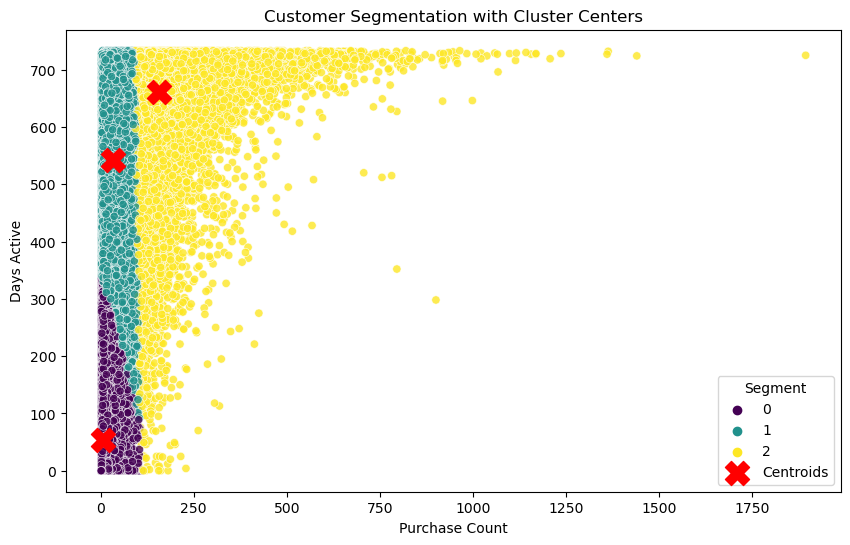

In [58]:
# Add cluster centers to the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features['purchase_count'], 
    y=customer_features['days_active'], 
    hue=customer_features['segment'], 
    palette='viridis', 
    alpha=0.8
)
# Denormalize the cluster centers for accurate placement
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    cluster_centers[:, 0], 
    cluster_centers[:, 1], 
    s=300, c='red', marker='X', label='Centroids'
)
plt.title("Customer Segmentation with Cluster Centers")
plt.xlabel("Purchase Count")
plt.ylabel("Days Active")
plt.legend(title="Segment")
plt.show()


## 3-D Scatter Plot

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


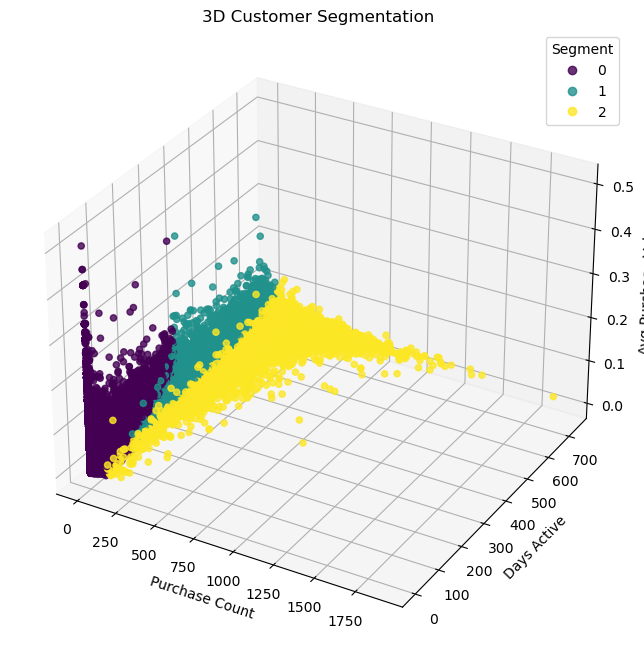

In [59]:
from mpl_toolkits.mplot3d import Axes3D

# Add an example feature (average purchase value)
customer_features['avg_purchase_value'] = transactions.groupby('customer_id')['price'].mean()

# Fit K-Means with 3D data
scaled_3d_features = scaler.fit_transform(customer_features[['purchase_count', 'days_active', 'avg_purchase_value']])
kmeans.fit(scaled_3d_features)

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    customer_features['purchase_count'], 
    customer_features['days_active'], 
    customer_features['avg_purchase_value'], 
    c=customer_features['segment'], 
    cmap='viridis', 
    alpha=0.8
)
ax.set_title("3D Customer Segmentation")
ax.set_xlabel("Purchase Count")
ax.set_ylabel("Days Active")
ax.set_zlabel("Avg Purchase Value")
plt.legend(*scatter.legend_elements(), title="Segment")
plt.show()


## Create a Sparse Matrix

In [61]:
import pandas as pd
from scipy.sparse import csr_matrix

# Step 1: Reduce the size of the dataset
sampled_transactions = transactions.sample(frac=0.1, random_state=42)  # Take 10% of the data

# Step 2: Filter for most active customers and frequently purchased articles
top_customers = sampled_transactions['customer_id'].value_counts().head(10000).index
top_articles = sampled_transactions['article_id'].value_counts().head(1000).index

filtered_transactions = sampled_transactions[
    (sampled_transactions['customer_id'].isin(top_customers)) & 
    (sampled_transactions['article_id'].isin(top_articles))
]

# Step 3: Create a sparse user-item matrix
user_item_matrix = filtered_transactions.groupby(['customer_id', 'article_id']).size().unstack(fill_value=0)
user_item_sparse = csr_matrix(user_item_matrix)

# Step 4: Verify the sparse matrix shape
print(f"Sparse matrix shape: {user_item_sparse.shape}")


Sparse matrix shape: (9457, 1000)


The user-item matrix for customers and articles was transformed into a sparse matrix to efficiently perform:

Nearest Neighbors search for collaborative filtering.

Dimensionality reduction with Truncated SVD for optimized recommendations.


# Model Building- Collaborative Filtering

In [64]:
from sklearn.neighbors import NearestNeighbors

# Fit a Nearest Neighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)
model.fit(user_item_sparse)

# Recommend articles for a customer
def recommend_articles(customer_id, n_recommendations=5):
    if customer_id not in user_item_matrix.index:
        return f"Customer ID {customer_id} not found."

    # Get the index of the customer in the matrix
    customer_idx = user_item_matrix.index.get_loc(customer_id)

    # Find nearest neighbors
    distances, indices = model.kneighbors(user_item_sparse[customer_idx], n_neighbors=n_recommendations+1)

    # Get articles purchased by similar customers
    recommended_articles = []
    for idx in indices.flatten()[1:]:  # Skip the first result (itself)
        similar_customer_articles = user_item_matrix.iloc[idx].nlargest(n_recommendations)
        recommended_articles.extend(similar_customer_articles.index.tolist())

    return list(set(recommended_articles))

# Example: Recommend articles for a customer
example_customer_id = user_item_matrix.index[0]
recommendations = recommend_articles(example_customer_id, n_recommendations=5)
print(f"Recommended Articles for Customer {example_customer_id}: {recommendations}")


Recommended Articles for Customer 0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94: [610776001, 675068002, 516000001, 108775044, 108775015, 111565001, 507909001, 399136011, 399201005, 111586001, 583534002]


The function recommend_articles generates article recommendations based on collaborative filtering.

## Dimensionality Reduction

In [65]:
from sklearn.decomposition import TruncatedSVD

# Reduce dimensions
svd = TruncatedSVD(n_components=50, random_state=42)
user_item_reduced = svd.fit_transform(user_item_sparse)

# Fit Nearest Neighbors on the reduced data
model_svd = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)
model_svd.fit(user_item_reduced)

# Example: Recommend articles for a customer using reduced data
distances, indices = model_svd.kneighbors(user_item_reduced[0].reshape(1, -1), n_neighbors=5)
print(f"Similar Customers: {indices.flatten()}")


Similar Customers: [   0 2487 9310 7376 2628]


The reduced representation improves computation speed and provides similar results with enhanced performance.


# Conclusion

This project implements a personalized fashion recommendation system using content-based and collaborative filtering techniques. By leveraging TF-IDF vectorization and Nearest Neighbors, we built a content-based model that recommends similar articles based on product features. Collaborative filtering was implemented using a sparse user-item matrix and dimensionality reduction (Truncated SVD) to identify patterns in customer purchase behavior. Additionally, K-Means clustering segmented customers into three groups based on activity and purchase patterns, providing actionable insights for targeted marketing. The outcomes include efficient recommendations, customer segmentation for personalized strategies, and data-driven insights into popular products and customer preferences, enabling a robust and scalable solution for fashion retail analytics.






